# Objective

The objective of the Jupyter Notebook is to develop a regression model predicting product demand by forecasting sales. Leveraging a dataset encompassing transactional, shipping, customer, and product-related details, the notebook aims to uncover influential factors affecting sales volume. The approach involves data preprocessing, exploratory data analysis, and feature engineering to comprehend relationships and patterns within the data. Through model development, training, and evaluation, the notebook strives to create an accurate regression model capable of predicting sales, thereby enabling informed decision-making and insights for business optimization in understanding customer behavior, market trends, and key variables impacting sales.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
#import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# Importing Required Libraries to build models for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.linalg import dft
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor


# Importing Required Libraries to check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# Data Overview

In [2]:
# Importing the dataset

raw_df=pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin')

Data Dictionary

Type,:  Type of transaction made

Days for shipping (real)     ,:  Actual shipping days of the purchased product

Days for shipment (scheduled),:  Days of scheduled delivery of the purchased product

Benefit per order,:  Earnings per order placed

Sales per customer,:  Total sales per customer made per customer

Delivery Status,":  Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time"

Late_delivery_risk           ,":  Categorical variable that indicates if sending is late (1), it is not late (0)."

Category Id,:  Product category code

Category Name,:  Description of the product category

Customer City,:  City where the customer made the purchase

Customer Country,:  Country where the customer made the purchase

Customer Email,:  Customer's email

Customer Fname,:  Customer name

Customer Id,:  Customer ID

Customer Lname,:  Customer lastname

Customer Password,:  Masked customer key

Customer Segment,":  Types of Customers: Consumer , Corporate , Home Office"

Customer State,:  State to which the store where the purchase is registered belongs

Customer Street,:  Street to which the store where the purchase is registered belongs

Customer Zipcode,:  Customer Zipcode

Department Id,:  Department code of store

Department Name,:  Department name of store

Latitude,:  Latitude corresponding to location of store

Longitude,:  Longitude corresponding to location of store

Market,":  Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA"

Order City,:  Destination city of the order

Order Country,:  Destination country of the order

Order Customer Id,:  Customer order code

order date (DateOrders),:  Date on which the order is made

Order Id,:  Order code

Order Item Cardprod Id,:  Product code generated through the RFID reader

Order Item Discount,:  Order item discount value

Order Item Discount Rate     ,:  Order item discount percentage

Order Item Id,:  Order item code

Order Item Product Price     ,:  Price of products without discount

Order Item Profit Ratio,:  Order Item Profit Ratio

Order Item Quantity,:  Number of products per order

Sales,:  Value in sales

Order Item Total  ,:  Total amount per order

Order Profit Per Order,:  Order Profit Per Order

Order Region,":  Region of the world where the order is delivered :  Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia ,  Europe , Central America, Eastern Europe , South of  USA "

Order State,:  State of the region where the order is delivered

Order Status,":  Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW"

Product Card Id,:  Product code

Product Category Id,:  Product category code

Product Description,:  Product Description

Product Image,:  Link of visit and purchase of the product

Product Name,:  Product Name

Product Price,:  Product Price

Product Status,":  Status of the product stock :If it is 1 not available , 0 the product is available "

Shipping date (DateOrders)   ,:  Exact date and time of shipment
"
Shipping Mode,":  The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day"

In [3]:
raw_df.shape

(180519, 53)

In [4]:
raw_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
raw_df.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


In [6]:
# Checking Summary of Dataset and data types of columns

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Exploratory Data Analysis

In [7]:
raw_df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [8]:
raw_df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [9]:
raw_df.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [10]:
# Check Duplicated Values

duplicated_rows = raw_df[raw_df.duplicated()]
duplicated_rows

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


#### Univariate Analysis

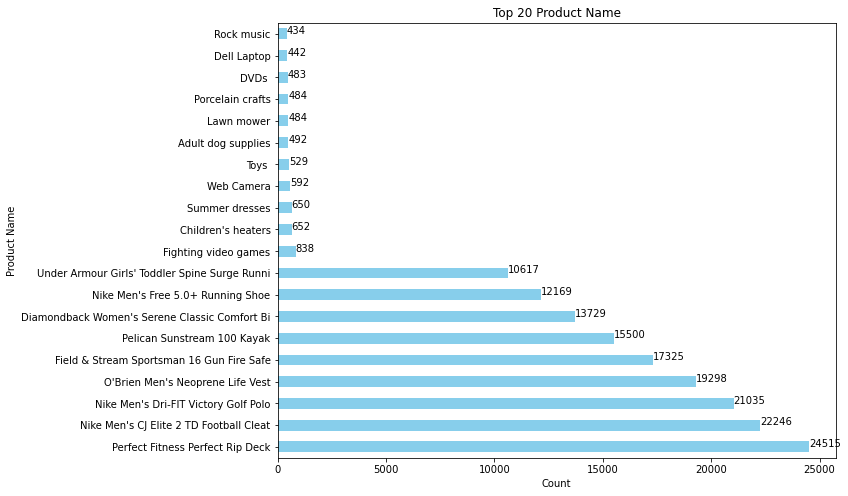

In [11]:
product_counts = raw_df['Product Name'].value_counts()[:20]

# Creating a horizontal bar chart
plt.figure(figsize=(10,8))
ax = product_counts.plot(kind='barh', color='skyblue')
plt.title('Top 20 Product Name')
plt.xlabel('Count')
plt.ylabel('Product Name')

# Annotating each bar with its count
for index, value in enumerate(product_counts):
    ax.text(value, index, str(value))

plt.show()

Text(0.5, 1.0, 'Departments')

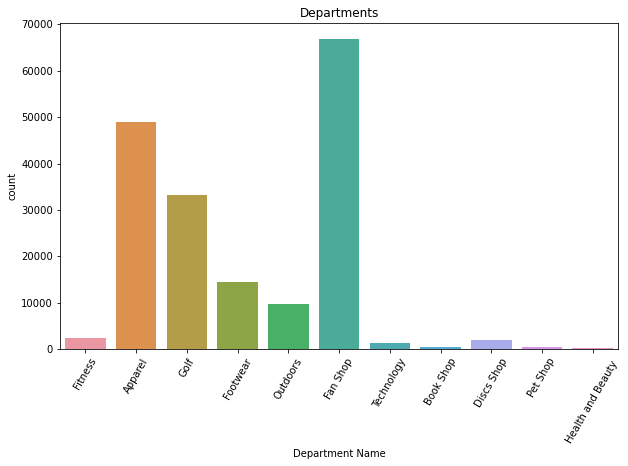

In [12]:
plt.figure(figsize=(10,6))
plot = sns.countplot(x='Department Name', data=raw_df);
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plt.title("Departments")

Text(0.5, 1.0, 'Market list')

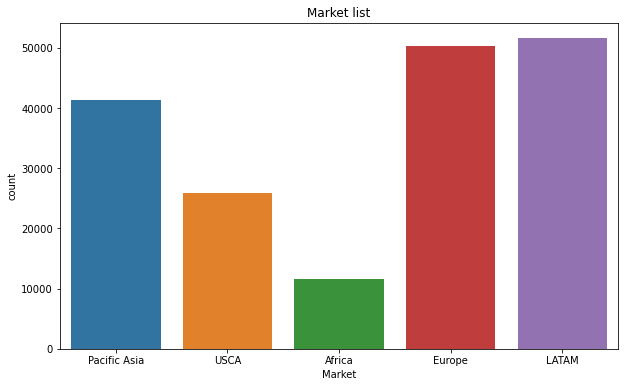

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x=raw_df['Market']);
plt.title("Market list")

Text(0.5, 1.0, 'Top 15 Category of goods')

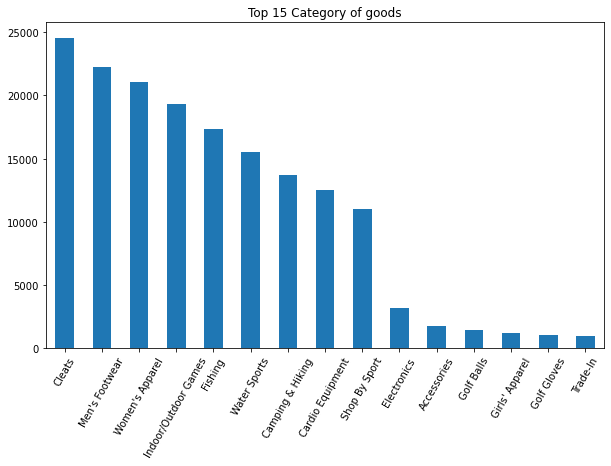

In [14]:
plt.figure(figsize=(10,6))
raw_df['Category Name'].value_counts()[:15].plot(kind='bar')
plt.xticks(rotation = 60)
plt.title("Top 15 Category of goods")

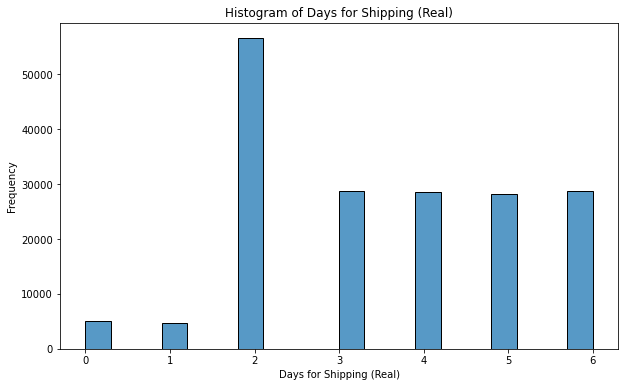

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(raw_df['Days for shipping (real)'], bins=20, kde=False)
plt.title('Histogram of Days for Shipping (Real)')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Frequency')
plt.show()

#### Bivariate Analysis

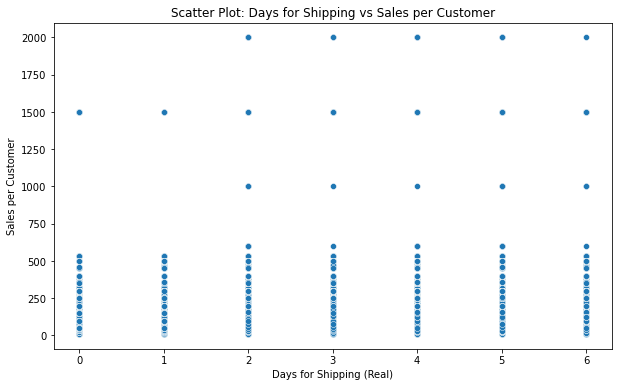

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days for shipping (real)', y='Sales', data=raw_df)
plt.title('Scatter Plot: Days for Shipping vs Sales per Customer')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Sales per Customer')
plt.show()

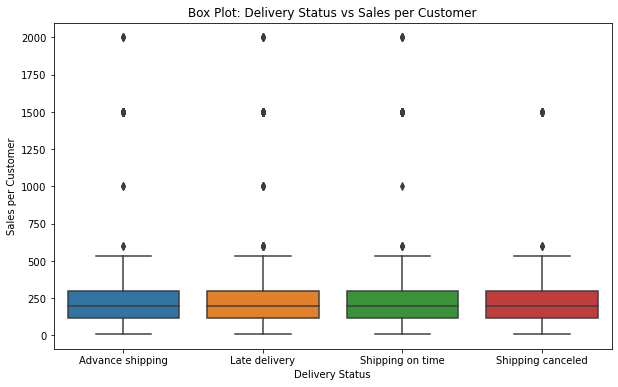

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delivery Status', y='Sales', data=raw_df)
plt.title('Box Plot: Delivery Status vs Sales per Customer')
plt.xlabel('Delivery Status')
plt.ylabel('Sales per Customer')
plt.show()

#### Categorical vs Numerical

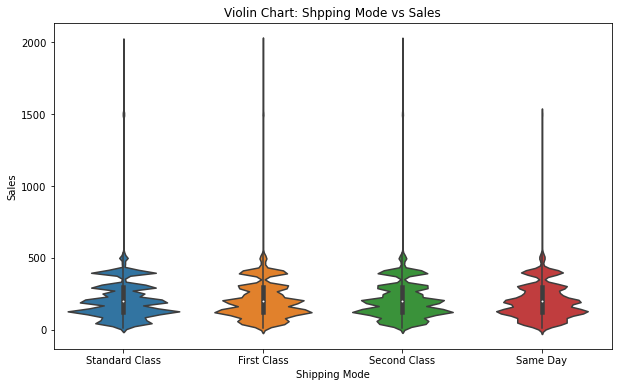

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Shipping Mode', y='Sales', data=raw_df)
plt.title('Violin Chart: Shpping Mode vs Sales')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.show()

#### Numerical vs Numerical

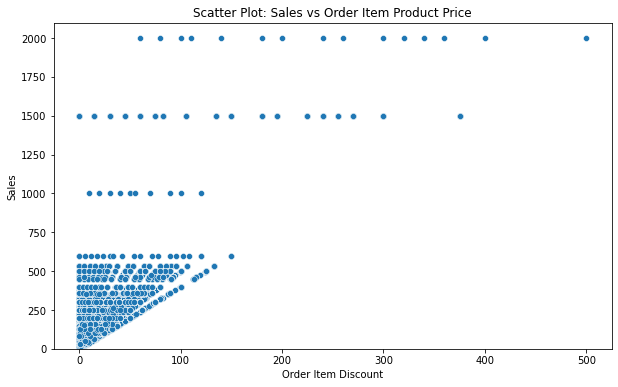

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Item Discount', y='Sales',data=raw_df)
plt.ylim(bottom=0)
plt.title('Scatter Plot: Sales vs Order Item Product Price')
plt.xlabel('Order Item Discount')
plt.ylabel('Sales')
plt.show()

#### Categorical vs Categorical 

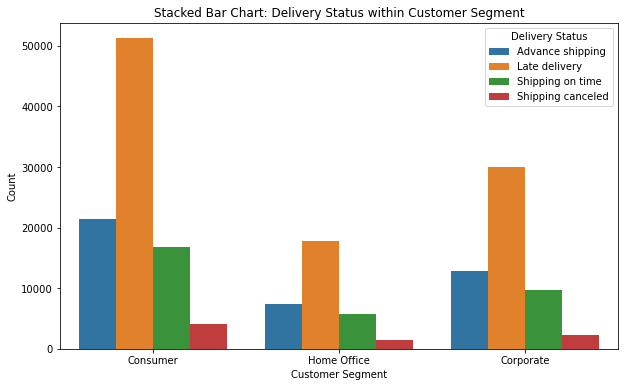

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer Segment', hue='Delivery Status', data=raw_df)
plt.title('Stacked Bar Chart: Delivery Status within Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

#### Correlation chart

<AxesSubplot:>

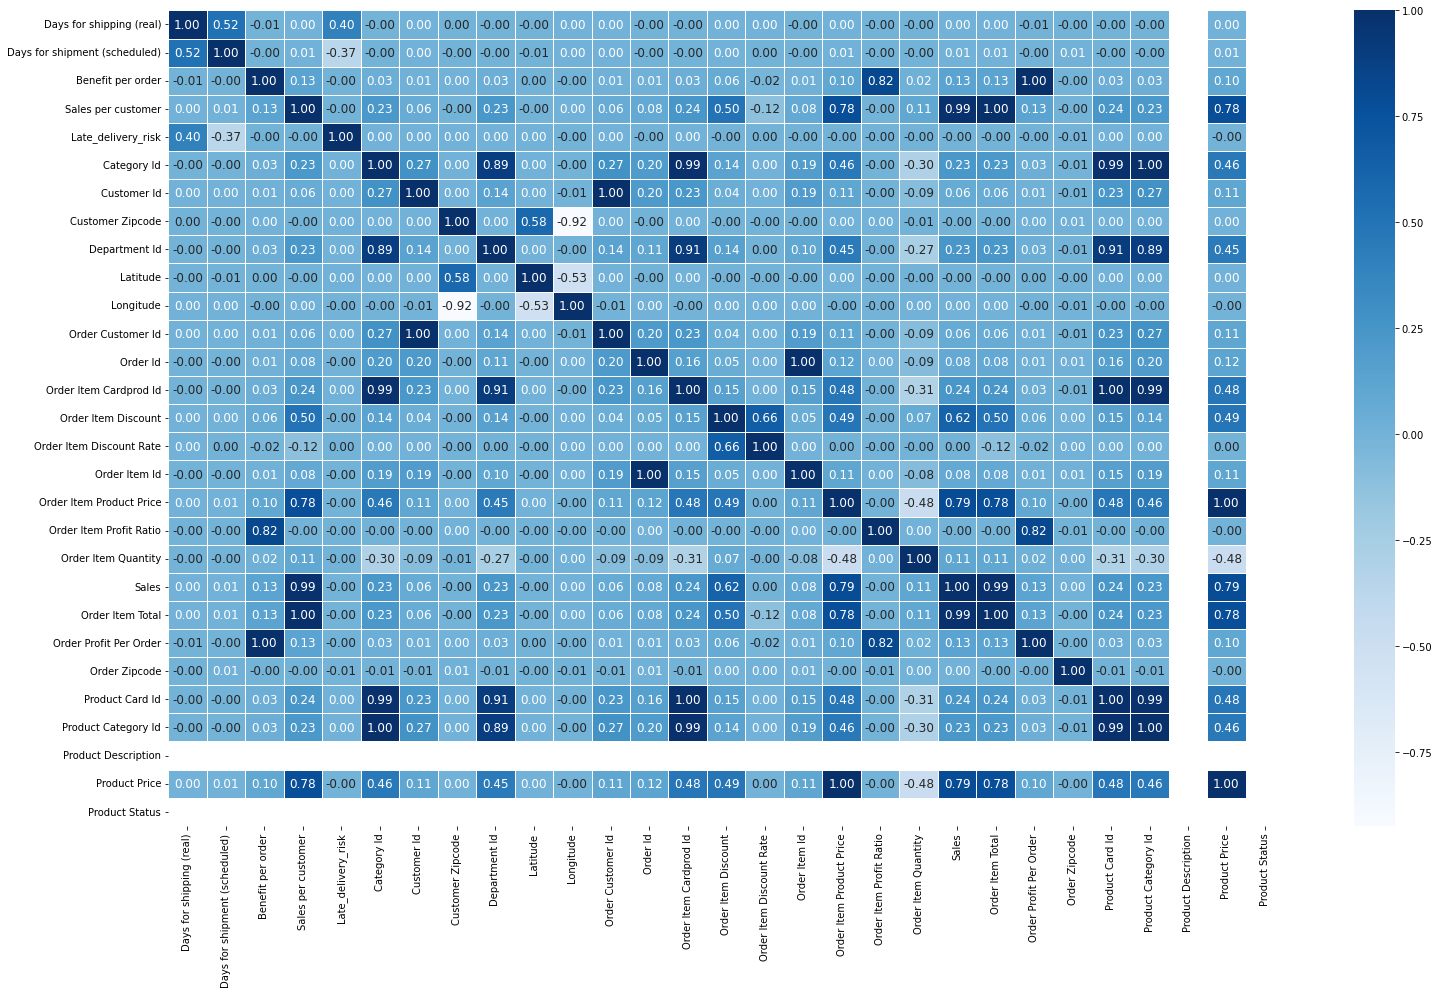

In [21]:
plt.figure(figsize=(25,15))
sns.heatmap(data=raw_df.corr(), annot=True, fmt='.2f', cmap='Blues', annot_kws={"fontsize": 12}, linewidths=0.5)

# Data Preparation

In [22]:
#Removing one of the two variables which are highlt correlated(>0.99)

# Removing the columns with most missing values and also the columns that are not dependent for the target variable

df=raw_df.drop(['Order Zipcode','Product Description','Type', 'Category Id','Customer Email','Customer City',
                'Customer Country','Customer Email','Customer Fname', 'Customer Id', 'Customer Lname' ,
              'Customer Password','Customer State','Customer Street','Customer Zipcode','Department Id',
                'Latitude','Longitude','Market','Order Customer Id','Order Id','Order Item Cardprod Id',
                'Order Item Id','Order Zipcode','Product Category Id', 'shipping date (DateOrders)', 
                'Product Description', 'Product Image','order date (DateOrders)','Order City','Order State',
                'Order Country','Product Card Id','Sales per customer',
                'Order Profit Per Order','Order Item Product Price'],axis=1)

In [23]:
# Removing the rows with missing values since there are less             
df = df.dropna()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Delivery Status                180519 non-null  object 
 4   Late_delivery_risk             180519 non-null  int64  
 5   Category Name                  180519 non-null  object 
 6   Customer Segment               180519 non-null  object 
 7   Department Name                180519 non-null  object 
 8   Order Item Discount            180519 non-null  float64
 9   Order Item Discount Rate       180519 non-null  float64
 10  Order Item Profit Ratio        180519 non-null  float64
 11  Order Item Quantity            180519 non-null  int64  
 12  Sales                         

# Feature Engineering

In [25]:
# Label Encoding for the features that follow ordinality

label_encoder=LabelEncoder()
df['Delivery Status'] = label_encoder.fit_transform(df['Delivery Status'])
df['Order Status'] = label_encoder.fit_transform(df['Order Status'])
df['Shipping Mode'] = label_encoder.fit_transform(df['Shipping Mode'])

In [26]:
cols=['Category Name', 'Customer Segment', 'Department Name', 'Order Region',  'Product Name',
      'Delivery Status','Order Status','Shipping Mode']

for col in cols:
    print(df[col].value_counts())

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              423
Books     

In [27]:
# One hot encoding

columns_to_encode = ['Category Name', 'Customer Segment', 'Department Name', 'Order Region', 'Product Name']

df= pd.get_dummies(df, columns=columns_to_encode)

print(df.head())

   Days for shipping (real)  Days for shipment (scheduled)  Benefit per order  \
0                         3                              4          91.250000   
1                         5                              4        -249.089996   
2                         4                              4        -247.779999   
3                         3                              4          22.860001   
4                         2                              4         134.210007   

   Delivery Status  Late_delivery_risk  Order Item Discount  \
0                0                   0            13.110000   
1                1                   1            16.389999   
2                3                   0            18.030001   
3                0                   0            22.940001   
4                0                   0            29.500000   

   Order Item Discount Rate  Order Item Profit Ratio  Order Item Quantity  \
0                      0.04                     0.29     

In [28]:
# Strip column names and eliminate left and right spaces
#raw_df.columns = raw_df.columns.str.strip()

In [29]:
# Data Normalization

# Selecting numerical features for normalization

columns_to_scale = [
    'Days for shipping (real)','Days for shipment (scheduled)', 'Benefit per order',
     'Late_delivery_risk','Order Item Discount', 'Order Item Discount Rate', 'Order Item Profit Ratio',
    'Order Item Quantity','Sales', 'Product Price', 'Product Status','Order Item Total'
]


# MinMaxScaler
scale = MinMaxScaler()

df_scale=df.copy()
df_scale[columns_to_scale] = scale.fit_transform(df_scale[columns_to_scale])
#df_scale = scale.fit_transform(df_scale)

# Display - Normalized Data:
print("\nNormalized Data:")
df_scale.head()


Normalized Data:


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,...,Product Name_Under Armour Women's Ignite Slide,Product Name_Under Armour Women's Micro G Skulpt Running S,Product Name_Web Camera,Product Name_Yakima DoubleDown Ace Hitch Mount 4-Bike Rack,Product Name_adidas Brazuca 2014 Official Match Ball,Product Name_adidas Kids' F5 Messi FG Soccer Cleat,Product Name_adidas Men's F10 Messi TRX FG Soccer Cleat,Product Name_adidas Men's Germany Black Crest Away Tee,Product Name_adidas Youth Germany Black/Red Away Match Soc,Product Name_insta-bed Neverflat Air Mattress
0,0.500000,1.0,0.841800,0,0.0,0.02622,0.16,0.935385,0.0,0.159678,...,0,0,0,0,0,0,0,0,0,0
1,0.833333,1.0,0.776183,1,1.0,0.03278,0.20,0.600000,0.0,0.159678,...,0,0,0,0,0,0,0,0,0,0
2,0.666667,1.0,0.776435,3,0.0,0.03606,0.24,0.600000,0.0,0.159678,...,0,0,0,0,0,0,0,0,0,0
3,0.500000,1.0,0.828614,0,0.0,0.04588,0.28,0.870769,0.0,0.159678,...,0,0,0,0,0,0,0,0,0,0
4,0.333333,1.0,0.850082,0,0.0,0.05900,0.36,0.984615,0.0,0.159678,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#df['order date (DateOrders)'] = df['order date (DateOrders)'].astype(int) // 10**9

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Columns: 220 entries, Days for shipping (real) to Product Name_insta-bed Neverflat Air Mattress
dtypes: float64(7), int64(8), uint8(205)
memory usage: 56.0 MB


# Data Partitioning

In [32]:
# Selecting the dependent and target variables

x=df.drop('Sales',axis=1)
y = df['Sales']

In [33]:
# Splitting the dataset into 75% train set and 25% test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=1)

print("Shape of training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of training set :  (135389, 219)
Shape of test set :  (45130, 219)


# Model Building and Performance Evaluation

Linear Regression Model

In [34]:
model1_LRM = LinearRegression()

# Fitting the model to the training data
model1_LRM.fit(x_train, y_train)

feature_weights_LRM = model1_LRM.coef_

# Printing the feature weights
print("Feature Weights:", feature_weights_LRM)

Feature Weights: [      0.00000366      -0.00000376       0.00000008      -0.0000068
      -0.00003023       0.99998516      -0.00175988      -0.00001645
      -0.00010153       1.00000219      -0.00000049   -1213.03222961
  -99881.49398982      -0.0000088   121733.45987712  612841.43395259
  266427.38746386  -36910.69640349  339251.14008061  -21945.60458416
    6283.25415357  -58025.18192338 -110349.93209375  246585.35085089
 -106990.34329579  408801.31101188 -527419.05475457  538797.46931847
 -250229.30880882  485269.52278958   27121.98938321  -42316.09739138
  303804.91126852  190972.90755788  254404.37295462  278849.79218134
  -23473.1546485    38707.61408023  -11081.70305568   44158.46682246
   -2773.89952959   81564.86844401   57699.00269981  179996.71454642
   71616.87774283  167101.62202855  -53324.4778691   334485.11808558
  308160.5603685    21481.33063516   99428.39573476  -14495.84505558
  247304.61448748  -52535.64660243  112013.04164907  712272.81188348
  -67895.63290777 

In [35]:
# Predicting on the test data
y_pred = model1_LRM.predict(x_test)

mae1 = mean_absolute_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
rmse1 = mean_squared_error(y_test, y_pred, squared=False)
r21 = r2_score(y_test, y_pred)

# Printing the metrics
print("Mean Absolute Error (MAE):", mae1)
print("Mean Squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmse1)
print("R-squared (R2):", r21)

Mean Absolute Error (MAE): 0.000601389079488075
Mean Squared Error (MSE): 2.243588067540021e-06
Root Mean Squared Error (RMSE): 0.0014978611643073
R-squared (R2): 0.9999999998677717


Ridge Regression Model

In [36]:
model2_ridge = Ridge(alpha=1.0)

# Fitting the model to the training data
model2_ridge.fit(x_train, y_train)

# Predicting on the test data
y_pred = model2_ridge.predict(x_test)

mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test, y_pred)

# Printing the performance metrics
print("Mean Absolute Error (MAE):", mae2)
print("Mean Squared Error (MSE):", mse2)
print("Root Mean Squared Error (RMSE):", rmse2)
print("R-squared (R2):", r22)

Mean Absolute Error (MAE): 0.000601182442113334
Mean Squared Error (MSE): 2.2435332446797152e-06
Root Mean Squared Error (RMSE): 0.0014978428638143973
R-squared (R2): 0.9999999998677749


Decision Tree Model

In [37]:
# Implementing Decision Tree Model and Fitting the model

model3_DTR = DecisionTreeRegressor(max_depth=15, min_samples_leaf=7, min_samples_split=5, max_leaf_nodes=None,max_features='auto')

# Training the regressor on the training data
model3_DTR.fit(x_train, y_train)

# Making predictions on the test data
y_pred = model3_DTR.predict(x_test)

# Evaluating the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.12500698783932293
Mean Squared Error (MSE): 2.2390151463575685
Root Mean Squared Error (RMSE): 1.4963339020277422
R-squared (R2): 0.9998680411681463


Random Forest Regressor

In [38]:
# Creating Random Forest Regressor
model4_RF = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_leaf=5, min_samples_split=30, max_features='auto', random_state=42)

# Training regressor on the training data
model4_RF.fit(x_train, y_train)

# Making predictions on the test data
y_pred = model4_RF.predict(x_test)

# Evaluating the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.14091466291106766
Mean Squared Error (MSE): 2.5387312371585797
Root Mean Squared Error (RMSE): 1.5933396490260887
R-squared (R2): 0.9998503770691365


# Model Comparison and Selection

Model Comparison and Selection:

Based on the evaluation metrics, the Linear Regression model emerged as the most suitable for predicting the target variable due to its exceptional performance in minimizing errors and achieving a high level of accuracy.
The Linear Regression model exhibited superior performance in terms of RMSE, R2, and MSE, showcasing precise predictions and an excellent fit to the dataset.


Summary:

The chosen Linear Regression model provides actionable insights into the relationships between various features and the target variable, enabling informed decision-making for optimizing sales forecasts and strategic planning.